# **Objective-** Apply k-means++ and k-medoids clustering to Amazon food reviews dataset (Tfidf word2vec representation)

#### **About the dataset**
Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews

The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.

* Number of reviews: 568,454 
* Number of users: 256,059 
* Number of products: 74,258 
* Timespan: Oct 1999 - Oct 2012 
* Number of Attributes/Columns in data: 10

##### **Attribute Information**:

1. Id ProductId - unique identifier for the product 
2. UserId - unqiue identifier for the user ProfileName 
3. HelpfulnessNumerator - number of users who found the review helpful 
4. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not 
5. Score - rating between 1 and 5 
6. Time - timestamp for the review 
7. Summary - brief summary of the review 
8. Text - text of the review

#### **Codes for-**
* Apply k-means++ and k-medoids algo to tfidf word2vec featurization.
* Apply elbow method to plot loss vs k graph.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
import warnings
warnings.filterwarnings('ignore')

## **1. Loading data**

In [3]:
#Loading the already prepared data
data=pd.read_csv('data.csv')
data.head(7)

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned_text
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,b'witti littl book make son laugh recit car dr...
1,138683,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,1,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,b'rememb see show air televis year sister late...
2,417839,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,1,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,b'beetlejuic well written movi everyth excel a...
3,212472,230285,B00004RYGX,A344SMIA5JECGM,Vincent P. Ross,1,2,1,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",b'twist rumplestiskin captur star michael keat...
4,417838,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,1,946857600,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,b'beetlejuic excel funni keaton hilari wacki g...
5,212533,230348,B00004RYGX,A1048CYU0OV4O8,Judy L. Eans,2,2,1,947376000,GREAT,THIS IS ONE MOVIE THAT SHOULD BE IN YOUR MOVIE...,b'one movi movi fill whatev els want call'
6,212458,230269,B00004RYGX,A1B2IZU1JLZA6,Wes,19,23,0,948240000,WARNING: CLAMSHELL EDITION IS EDITED TV VERSION,"I, myself always enjoyed this movie, it's very...",b'alway enjoy funni didnt hesit pick clamshel ...


In [4]:
#taking 100k points
sample_data=data.sample(100000)

#getting the list of sentences in a 'list'
i=0
list_of_sentences=[]
for sent in sample_data['Cleaned_text'].values:
    filtered_sentence=[]    
    for w in sent.split():
        if(w==sent.split()[0]):
            w=w[2:]
        filtered_sentence.append(w.lower())       
    list_of_sentences.append(filtered_sentence)

In [5]:
#defining a word2vec model
import gensim
w2v_model=gensim.models.Word2Vec(list_of_sentences,min_count=5,size=60, workers=4)    
words=list(w2v_model.wv.vocab)
print(len(words))

13026


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer(ngram_range=(1,1))
final_tf_idf = tf_idf_vect.fit_transform(sample_data['Cleaned_text'].values)

In [7]:
features=tf_idf_vect.get_feature_names()
len(features)
#features

33286

In [8]:
#calculating tf-idf w2vec
tfidf_vectors = []; 
row=0;
for sentence in list_of_sentences: 
    sentence_vec = np.zeros(60) 
    weight_sum =0; 
    for word in sentence: 
        try:
            vec = w2v_model.wv[word]
            tf_idf = final_tf_idf[row, features.index(word)]
            sentence_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
    sentence_vec /= weight_sum
    tfidf_vectors.append(sentence_vec)
    row += 1

In [9]:
nan_value_index=list(np.unique(np.where(np.isnan(tfidf_vectors))[0]))
nan_value_index

[4922, 37973, 42066, 44410, 47191, 48506, 64004, 73137]

In [12]:
tfidf_vectors=np.delete(tfidf_vectors, nan_value_index, axis=0)
tfidf_vectors=normalize(tfidf_vectors)

In [13]:
sample_data=sample_data.drop(sample_data.index[z], axis=0)
len(sample_data)

99994

In [14]:
len(tfidf_vectors)

99994

## **2. Applying k-means clustering method to Tfidf word2vec featurization**

In [15]:
# code borrowed from http://www.awesomestats.in/python-cluster-validation/
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init=5 )
  clusters.fit( tfidf_vectors )
  cluster_errors.append( clusters.inertia_ )

In [16]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [17]:
clusters_df[0:20]

,cluster_errors,num_clusters
0,77526.212189,1
1,70871.879865,2
2,65699.563249,3
3,62130.431713,4
4,59419.891809,5
5,57639.816216,6
6,56284.296305,7
7,54956.558380,8
8,53838.417379,9
9,52975.047045,10


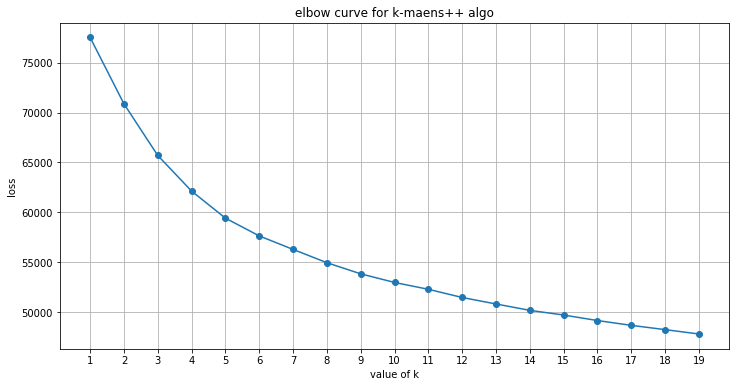

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,6))
plt.plot( list(range(1,20)), clusters_df.cluster_errors, marker = "o" )
plt.xticks(list(range(1,20)))
plt.title('elbow curve for k-maens++ algo')
plt.grid()
plt.xlabel('value of k')
plt.ylabel('loss')
plt.show()

**Observation-** we can have optimal number of clusters = 19

In [20]:
sample_data['cluster_label']=clusters.labels_
sample_data.head(5)

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned_text,cluster_label
73898,467123,505112,B002YVNK8W,A113B56LO5C2YV,"Kenneth R. Leibow ""Kaptk""",3,3,1,1259280000,Great Coffee,The coffee was delicious. I believe Costa Rica...,b'coffe believ costa rica grow best coffe pric...,0
154388,23175,25357,B000EH2QP6,A2LGV83LSQ4XI,Alexi Darling,0,0,1,1301529600,Puppy likes it!,I feed this to my puppy along with the dry for...,b'feed puppi along dri formula get eat lick bo...,13
223275,416842,450793,B0000V8IOE,A2VG1WY4V7CGWD,Jdsee,1,1,1,1322611200,Fantastic!,"Love this coffee! I've always enjoyed ""good"" ...",b'love coffe ive alway enjoy good coffe great ...,0
98809,430837,465931,B0029JZQ68,ALQ50X2O6GMLZ,"Richard Phillips ""Son of Panther Hall Cowtown...",1,1,1,1276300800,Really Good!,This is some of the best beef hearts and mecha...,b'best beef heart mechan separ chicken youll e...,8
80861,195083,211485,B000V9PDM0,A2S3D3CO3WOWBN,"L. Li ""Li mama""",1,1,1,1264550400,good instruction and details for taking care o...,There is good instruction in details about how...,b'good instruct detail take good care seed app...,5


In [21]:
label=sample_data.groupby(['cluster_label'])['cluster_label'].count()

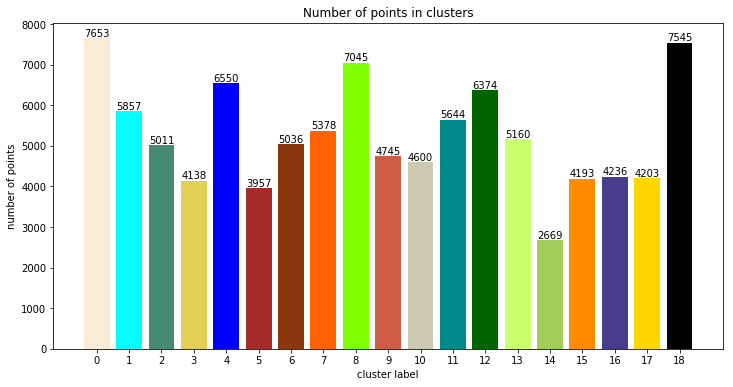

In [23]:
fig, ax = plt.subplots(figsize=(12,6))
mycolors = ['#FAEBD7', '#00FFFF', '#458B74', '#E3CF57', '#0000FF', '#A52A2A', '#8A360F', '#FF6103', '#7FFF00', '#CD5B45', '#CDC8B1', '#008B8B', '#006400', '#CAFF70', '#A2CD5A', '#FF8C00', '#483D8B', '#FFD700', '#030303']
rects1 = ax.bar(list(range(0,19)), label, color=mycolors)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%d' % int(height),
                ha='center', va='bottom')
autolabel(rects1)
plt.xticks(list(range(0,19)))
plt.xlabel('cluster label')
plt.ylabel('number of points')
plt.title('Number of points in clusters')
plt.show()

In [25]:
#randomly select reviews from each cluster

import random

for i in range(19):
    id=list(sample_data['Id'][sample_data['cluster_label']==i])
    random_id=[]
    for j in range(5):
        number=random.choice(id)
        random_id.append(number)
        id.remove(number)
    print('selected random reviews from cluster label : ',i)
    print('*'*60)
    for j in random_id:
        print(sample_data[sample_data['Id']==j].iloc[0]['Text'])
        print('\n')
        
        

selected random reviews from cluster label :  0
************************************************************
I sometimes go to a coffee shop for a special drink. Now I can enjoy at home! I make it with skim milk. I will buy it again. Thanks for a good product!


Eight O'Clock Colombian coffee is one of the best coffees out there. We tried a number of coffees in the same price range(that was before coffee prices skyrocketed)and the Eight O'Clock Colombian was the best tasting. If you want a good tasting coffee get Eight O'Clock 100% Colombian.


This coffee smells wonderful both while brewing and in the cup.  It is convenient and preserves freshness to have each packet make one pot of coffee.


We enjoy Timothy's World Coffee, French Roast for Keurig Brewers auto ship - only problem is we like a little variety and can't access our original order from 2 1/2 years ago to change the order.


This is one of our favorite decaf K-cups.  It is not overpowering and does not have a bitter after 

#### **Observations--**
1. Cluster seems from same group, like cluster-9 talks about tea, some of the cluster talks about oil and so on.
2. We observed that a few reviews from a cluster don't match with other reviews of the same cluster, it may be outliers.
3. There are some sort of cluster which contains review related to some food item which is different.

## **3. Applying k-medoids clustering method to tfidf word2vec representation**

In [28]:
# taking 25k datapoints
sample_data=data.sample(25000)

#getting the list of sentences in a 'list'
i=0
p=''
list_of_sentences=[]
for sent in sample_data['Cleaned_text'].values:
    filtered_sentence=[]    
    for w in sent.split():
        if(w==sent.split()[0]):
            w=w[2:]
            #p=w
        filtered_sentence.append(w.lower())       
    list_of_sentences.append(filtered_sentence)

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer(ngram_range=(1,1))
final_tf_idf = tf_idf_vect.fit_transform(sample_data['Cleaned_text'].values)

In [32]:
features=tf_idf_vect.get_feature_names()
len(features)
#features

17757

In [33]:
#defining a word2vec model
import gensim
w2v_model=gensim.models.Word2Vec(list_of_sentences,min_count=5,size=60, workers=4)    
words=list(w2v_model.wv.vocab)
print(len(words))

6794


In [34]:
#calculating tf-idf w2vec
tfidf_vectors = []; 
row=0;
for sentence in list_of_sentences: 
    sentence_vec = np.zeros(60) 
    weight_sum =0; 
    for word in sentence: 
        try:
            vec = w2v_model.wv[word]
            tf_idf = final_tf_idf[row, features.index(word)]
            sentence_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
    sentence_vec /= weight_sum
    tfidf_vectors.append(sentence_vec)
    row += 1

In [35]:
z=list(np.unique(np.where(np.isnan(tfidf_vectors))[0]))
z

[8700]

In [36]:
tfidf_vectors=np.delete(tfidf_vectors, z, axis=0)
tfidf_vectors=normalize(tfidf_vectors)

In [37]:
sample_data=sample_data.drop(sample_data.index[z], axis=0)
len(sample_data)

24999

In [38]:
len(tfidf_vectors)

24999

In [39]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(tfidf_vectors, metric='euclidean')
D.shape

(24999, 24999)

In [40]:
# For finding optimal value of number of clusters.
def compute_loss(M, C, data): # Squared Loss. !!
    loss = 0.0
    for key, arr in C.items():
        for pos in arr:
            loss = loss + ((data[M[key]] - data[pos]).sum()) ** 2
    
    return loss

In [41]:
# code borrowed from https://raw.githubusercontent.com/letiantian/kmedoids/master/kmedoids.py

import numpy as np
import random

def kMedoid(D, k, tmax=100):
    # determine dimensions of distance matrix D
    m, n = D.shape

    if k > n:
        raise Exception('too many medoids')

    # find a set of valid initial cluster medoid indices since we
    # can't seed different clusters with two points at the same location
    valid_medoid_inds = set(range(n))
    invalid_medoid_inds = set([])
    rs,cs = np.where(D==0)
    # the rows, cols must be shuffled because we will keep the first duplicate below
    index_shuf = list(range(len(rs)))
    np.random.shuffle(index_shuf)
    rs = rs[index_shuf]
    cs = cs[index_shuf]
    for r,c in zip(rs,cs):
        # if there are two points with a distance of 0...
        # keep the first one for cluster init
        if r < c and r not in invalid_medoid_inds:
            invalid_medoid_inds.add(c)
    valid_medoid_inds = list(valid_medoid_inds - invalid_medoid_inds)

    if k > len(valid_medoid_inds):
        raise Exception('too many medoids (after removing {} duplicate points)'.format(
            len(invalid_medoid_inds)))

    # randomly initialize an array of k medoid indices
    M = np.array(valid_medoid_inds)
    np.random.shuffle(M)
    M = np.sort(M[:k])

    # create a copy of the array of medoid indices
    Mnew = np.copy(M)

    # initialize a dictionary to represent clusters
    C = {}
    for t in range(tmax):
        # determine clusters, i. e. arrays of data indices
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]
        # update cluster medoids
        for kappa in range(k):
            J = np.mean(D[np.ix_(C[kappa],C[kappa])],axis=1)
            j = np.argmin(J)
            Mnew[kappa] = C[kappa][j]
        np.sort(Mnew)
        # check for convergence
        if np.array_equal(M, Mnew):
            break
        M = np.copy(Mnew)
    else:
        # final update of cluster memberships
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]

    # return results
    return M, C

In [43]:

# Choosing the best cluster using Elbow Method.
cluster_range=list(range(2,20))
errors = []
for cluster in cluster_range:
    M, C = kMedoid(D, cluster) # Training Clustering.
    errors.append(compute_loss(M, C, tfidf_vectors))
    #print(cluster)

In [45]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": errors } )

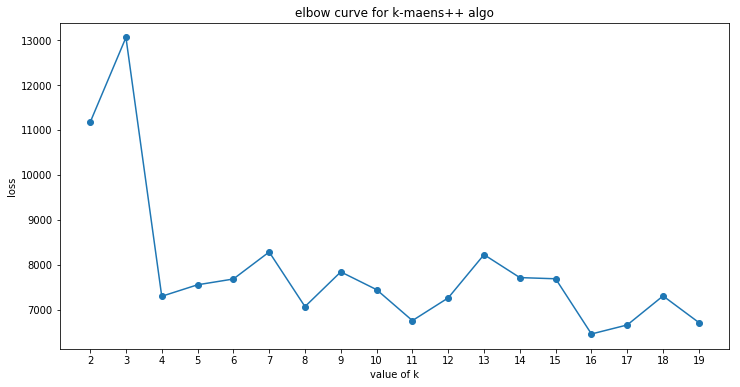

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,6))
plt.plot( list(range(2,20)), clusters_df.cluster_errors, marker = "o" )
plt.xticks(list(range(2,20)))
plt.title('elbow curve for k-maens++ algo')
plt.xlabel('value of k')
plt.ylabel('loss')
plt.show()

In [47]:
#finding oprimal_clusters
optimal_clusters = np.argmin(errors)+2
print('Optimal number of clusters = ',optimal_clusters)

Optimal number of clusters =  16


In [48]:
# k-medoids using optimal number of clusters
M,C=kMedoid(D,optimal_clusters)

In [49]:
# finding the length of each cluster
cluster_label=[]
label_length=[]
for i in range(len(C)):
    label_length.append(len(C[i]))
    cluster_label.append(i)

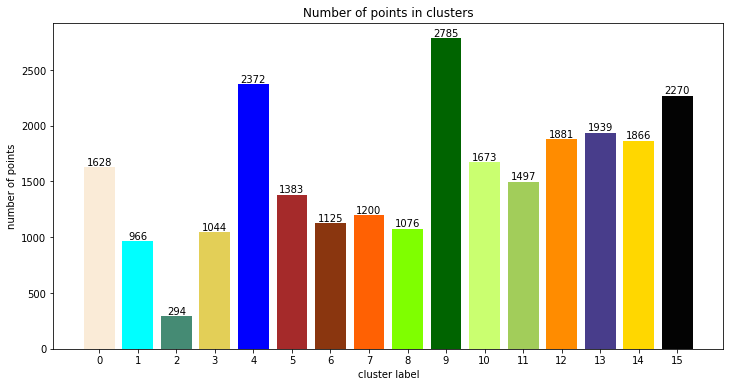

In [53]:
fig, ax = plt.subplots(figsize=(12,6))
mycolors = ['#FAEBD7', '#00FFFF', '#458B74', '#E3CF57', '#0000FF', '#A52A2A', '#8A360F', '#FF6103', '#7FFF00', '#006400', '#CAFF70', '#A2CD5A', '#FF8C00', '#483D8B', '#FFD700', '#030303']
rects1 = ax.bar(cluster_label, label_length, color=mycolors)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%d' % int(height),
                ha='center', va='bottom')
autolabel(rects1)
plt.xticks(list(range(0,len(C))))
plt.xlabel('cluster label')
plt.ylabel('number of points')
plt.title('Number of points in clusters')
plt.show()

In [55]:
#randomly select reviews from each cluster

import random

for i in range(len(C)):
    id=list(C[i])
    random_id=[]
    if(len(C[i])<3):
        num=len(C[i])
    else:
        num=3
    for j in range(num):
        number=random.choice(id)
        random_id.append(number)
        id.remove(number)
    print('selected random reviews from cluster label : '.upper(),i)
    print('*'*60)
    print('central review')
    print('-'*30)
    print(sample_data.iloc[M[i]]['Text'])
    print('-'*30)
    print('\n')
    print('review belongs to cluster ',i)
    print('-'*30)
    for j in random_id:
        print(sample_data.iloc[j]['Text'])
        print('\n')
        
        

SELECTED RANDOM REVIEWS FROM CLUSTER LABEL :  0
************************************************************
central review
------------------------------
Like some other reviewers, I was skeptical, but ordered based on the reviews here. I was even more skeptical when I opened the box and saw that it was "lite" tofu (I still don't know what that means, exactly). The stuff even looks bad as you slide it out of the box.<br /><br />However, it is a fantastic tofu product. It is smoother than any tofu I've bought from the grocery store, and I have used it in soups, stir fry, wraps, and plain. This will be the only tofu I buy from now on. If you like silky tofu, you will like this product.<br /><br />In addition to being awesomely tasty, it keeps unrefrigerated in my pantry. From experience, I know it keeps at least five days in the fridge once opened.
------------------------------


review belongs to cluster  0
------------------------------
I'm one of those people who has mysteriously de

#### **Observations-** 
1. The reviews are somehow related to their central reviews to some extent like some cluster talks about tea or some talks about dogs, but there are also some clusters that have different thing described.
2. Some of the clusters contain some outliers, like central review and some of the review belongs to that cluster are same but some are different.


## **4. Conclusion--**
1. K-means and k-medoids work well here. They try to find out some relation in the reviews and put it in one cluster.